In [38]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random


In [39]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')
x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [40]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train[1,:]

array([0.51372549, 0.50196078, 0.52941176, ..., 0.27843137, 0.37647059,
       0.29019608])

In [41]:
x_train.shape

(2000, 30000)

In [42]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)



In [59]:
print(y_test.shape)
print(y_train.shape)

(400, 1)
(2000, 1)


In [43]:
print(x_train.shape)

(2000, 100, 100, 3)


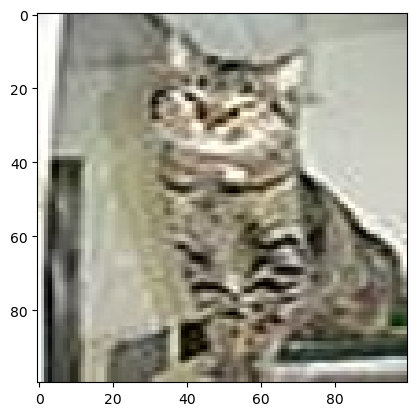

In [44]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [45]:
model=Sequential([            
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')


])

In [48]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.8062 - loss: 0.4434
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.8364 - loss: 0.3819
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.8718 - loss: 0.3255
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.8943 - loss: 0.2669
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9241 - loss: 0.2084
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9466 - loss: 0.1606
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9732 - loss: 0.1071
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9783 - loss: 0.0826
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9895 - loss: 0.0519
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9978 - loss: 0.0315


In [51]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6804 - loss: 1.4118


[1.2056509256362915, 0.6949999928474426]

# making predictions

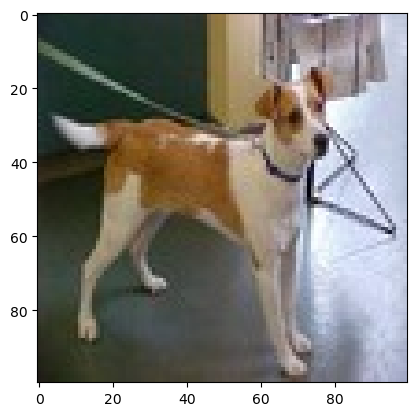

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.08385102]]
our model says it is a : cat


In [61]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred=y_pred>0.5

if(y_pred==0):
    pred='cat'
else:
    pred='dog'

print("our model says it is a :",pred)   
    



